<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%203/Ejercicio_1_Regresion_Calidad_Industrial_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 1: Regresión Lineal en Calidad Industrial**
#### Aplicación de Regresión Lineal para predecir la vida útil de motores industriales

### **Introducción**
En este ejercicio, aplicaremos un modelo de Regresión Lineal para predecir la vida útil restante de motores industriales. El objetivo es entrenar un modelo de regresión basado en datos de calidad industrial y evaluar su desempeño.

In [41]:
# Celda 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuración de gráficos
sns.set(style='whitegrid')

### **Descripción del dataset**
Se utilizará el dataset "Control de calidad en motores industriales", que contiene información relevante para la predicción.

In [42]:
# Celda 2
dataset_path = 'https://github.com/dtoralg/IE_Calidad_ML/raw/main/Data/control_calidad_motores_industriales.csv'
data = pd.read_csv(dataset_path)

# Mostrar las primeras filas del dataset
data.head()

,ID_motor,Horas_operación,Temperatura_núcleo,Vibración,Consumo_energía,Presión_sistema,Corriente_motor,Velocidad_rotación,Desgaste_rodamientos,Tipo_aceite,Fecha_instalación,Vida_util_restante
0,1,22483.570765,60.194280,50.788378,169.217891,4.890675,12.739756,3206.390527,0.446148,Aceite_C,2017-09-08,6796.483961
1,2,19308.678494,69.450144,55.628975,142.600705,5.191469,9.783470,3886.599281,0.729206,Aceite_A,2015-08-17,8435.835741
2,3,23238.442691,74.129716,53.411020,138.408382,5.367571,7.833826,2238.014366,0.349589,Aceite_C,2019-03-12,5812.314665
3,4,27615.149282,81.496689,37.220858,168.666243,4.408318,12.783922,2908.111788,0.637520,Aceite_D,2016-05-20,0.000000
4,5,18829.233126,90.241623,48.137797,95.369205,5.050369,9.773646,2948.707353,0.532590,Aceite_C,2022-11-05,3043.413697


In [43]:
# Celda 3
# Información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_motor              30000 non-null  int64  
 1   Horas_operación       30000 non-null  float64
 2   Temperatura_núcleo    30000 non-null  float64
 3   Vibración             30000 non-null  float64
 4   Consumo_energía       30000 non-null  float64
 5   Presión_sistema       30000 non-null  float64
 6   Corriente_motor       30000 non-null  float64
 7   Velocidad_rotación    30000 non-null  float64
 8   Desgaste_rodamientos  30000 non-null  float64
 9   Tipo_aceite           30000 non-null  object 
 10  Fecha_instalación     30000 non-null  object 
 11  Vida_util_restante    30000 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 2.7+ MB


In [44]:
# Celda 4
# Resumen estadístico
data.describe()

,ID_motor,Horas_operación,Temperatura_núcleo,Vibración,Consumo_energía,Presión_sistema,Corriente_motor,Velocidad_rotación,Desgaste_rodamientos,Vida_util_restante
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,19998.225501,80.002355,52.554125,150.073830,5.125828,10.004498,2995.491462,0.500446,4988.248172
std,8660.398374,4993.338452,10.048639,21.713066,19.994214,1.062090,1.990656,501.801119,0.099575,1990.582943
min,1.000000,387.998742,35.343961,5.370315,74.347690,3.000334,2.637920,812.978601,0.058611,0.000000
25%,7500.750000,16614.002922,73.205970,43.485282,136.627901,4.671080,8.659180,2659.022559,0.432872,3639.716866
50%,15000.500000,20009.364842,80.033086,50.299583,150.154682,5.011530,9.994661,2998.251579,0.500667,4983.090021
75%,22500.250000,23374.494416,86.845988,57.244945,163.498108,5.363604,11.341908,3334.269260,0.567838,6319.249441
max,30000.000000,42395.421255,117.453792,375.371764,234.040518,18.265578,17.953736,4891.093924,0.867819,12756.433756


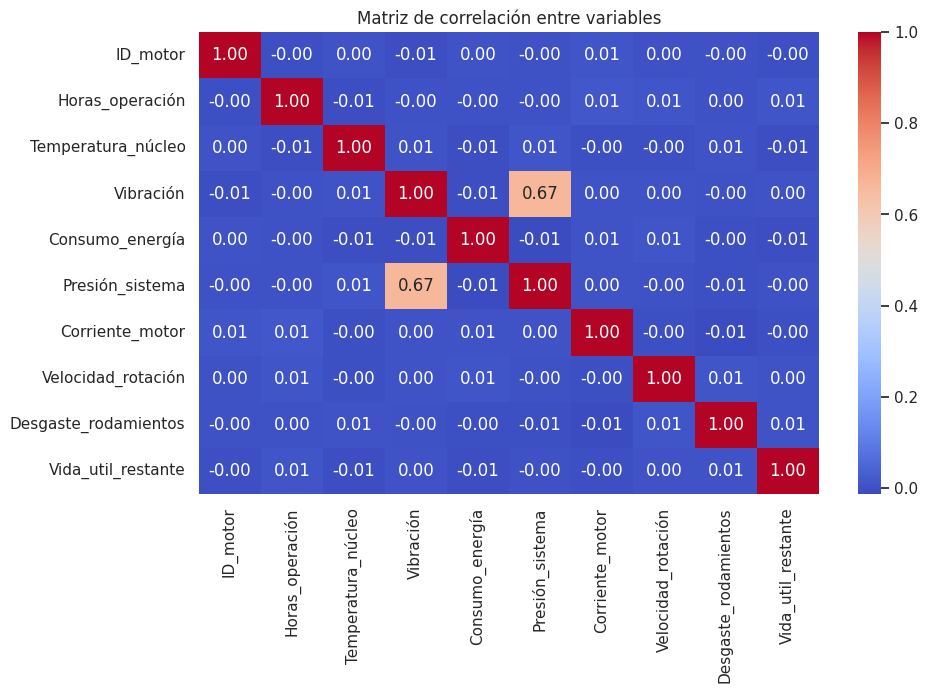

In [45]:
# Celda 5
# Seleccionar solo las columnas numéricas para la matriz de correlación
numeric_data = data.select_dtypes(include=['number'])

# Matriz de correlación
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

### **Preparación de los datos**
Se seleccionan las variables predictoras y la variable objetivo, y se dividen los datos en entrenamiento y prueba.

In [46]:
# Convertir variables categóricas y de fecha a formato adecuado.
# Como no buscamos predecir series temporales, vamos a convertir la variable "Fecha_instalación" a una variable numérica, "Dias_desde_instalacion"

# Convertir la variable Tipo_aceite en variables dummies
data = pd.get_dummies(data, columns=['Tipo_aceite'], drop_first=True)

# Convertir la variable Fecha_instalación a número de días desde la instalación
data['Fecha_instalación'] = pd.to_datetime(data['Fecha_instalación'])
data['Dias_desde_instalacion'] = (pd.to_datetime('today') - data['Fecha_instalación']).dt.days

# Eliminar la columna original de fecha
data.drop(columns=['Fecha_instalación'], inplace=True)

# Verificar la estructura del dataset después de las transformaciones
data.head()


,ID_motor,Horas_operación,Temperatura_núcleo,Vibración,Consumo_energía,Presión_sistema,Corriente_motor,Velocidad_rotación,Desgaste_rodamientos,Vida_util_restante,Tipo_aceite_Aceite_B,Tipo_aceite_Aceite_C,Tipo_aceite_Aceite_D,Dias_desde_instalacion
0,1,22483.570765,60.194280,50.788378,169.217891,4.890675,12.739756,3206.390527,0.446148,6796.483961,False,True,False,2739
1,2,19308.678494,69.450144,55.628975,142.600705,5.191469,9.783470,3886.599281,0.729206,8435.835741,False,False,False,3492
2,3,23238.442691,74.129716,53.411020,138.408382,5.367571,7.833826,2238.014366,0.349589,5812.314665,False,True,False,2189
3,4,27615.149282,81.496689,37.220858,168.666243,4.408318,12.783922,2908.111788,0.637520,0.000000,False,False,True,3215
4,5,18829.233126,90.241623,48.137797,95.369205,5.050369,9.773646,2948.707353,0.532590,3043.413697,False,True,False,855


In [47]:
# Celda 6
# Definir variables predictoras y objetivo
X = data.drop(columns=['Vida_util_restante'])
y = data['Vida_util_restante']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Entrenamiento del modelo**
Se entrena un modelo de Regresión Lineal con los datos de entrenamiento.

In [48]:
# Celda 7
# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

### **Evaluación del modelo**
Se evalúa el modelo con métricas de error comunes en regresión.

In [49]:
# Celda 8
y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinación (R²): {r2:.2f}')

Error Absoluto Medio (MAE): 1598.85
Error Cuadrático Medio (MSE): 3993049.55
Coeficiente de Determinación (R²): -0.00


### **Visualización de resultados**
Se comparan los valores reales con los predichos.

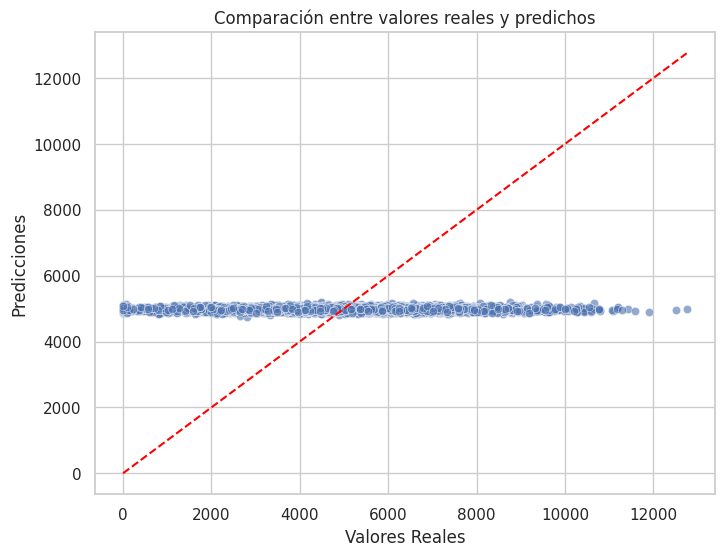

In [50]:
# Celda 9
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predichos')
plt.show()

### **Conclusiones**
En este ejercicio, hemos aplicado un modelo de Regresión Lineal para predecir la vida útil restante de motores industriales. Se exploraron las relaciones entre variables, se entrenó el modelo y se evaluaron sus métricas de desempeño.

Posibles mejoras incluyen la selección de características más relevantes y la aplicación de modelos más avanzados.